## Regression in PyTorch

In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
x = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.])
x

tensor([0., 1., 2., 3., 4., 5., 6., 7.])

In [4]:
# y = m * x + b

#Some random noise added
y = -0.5*x + 2 + torch.normal(mean = torch.zeros(8), std = 0.2)  

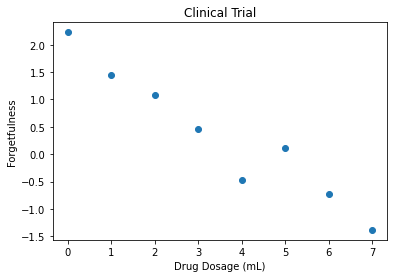

In [5]:
fig, ax = plt.subplots()
plt.title("Clinical Trial")
plt.xlabel('Drug Dosage (mL)')
plt.ylabel('Forgetfulness')
_ = ax.scatter(x, y)